In [1]:
import pandas as pd

In [78]:
df = pd.read_csv("salaries.csv")
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [79]:
#First we have to set target variable and Independent Variable 
inputs = df.drop('salary_more_then_100k',axis='columns') #Getting all independent variables in one column so we are dropping the dependent column from the dataset
target = df["salary_more_then_100k"]#Setting Dependent variable as target

In [80]:
inputs

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [81]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [82]:
#But hence we already know that the Machine Learning Models only works on Numbers not on string.
#So for converting string into numbers we will use LabelEncoder()
from sklearn.preprocessing import LabelEncoder

In [83]:
le_company=LabelEncoder()
le_job=LabelEncoder( )
le_degree=LabelEncoder()

In [84]:
inputs['company_n'] = le_company.fit_transform(inputs['company']) #Adding new column in my droped dataframe
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

In [85]:
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


#### Now here we converted company,degree,job in Numerical ways and they are as follows
1) ABC pharma = 0
2) Facebook = 1
3) Google = 2
#### Now Degree in numbers converted and they are
1) Bacholors = 0
 2) Masters = 1
#### Job Converted into numbers and they are
1) Sales Executive = 2
2) Business MAnager = 1
3) Computer Programmer = 0

In [86]:
new_df=inputs.drop(['company','job','degree'],axis = 'columns')

In [87]:
new_df#Now we got the last sorted column where we only have to deal with the numbers and not with Strings

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [109]:
from sklearn import tree
from sklearn.model_selection import train_test_split
model = tree.DecisionTreeClassifier()


In [110]:
X_train,X_test,y_train,y_test = train_test_split(new_df,target,test_size=.5)

In [90]:
X_test#This will show some Samples randomly which can be tested 

,company_n,job_n,degree_n
3,2,0,1
9,0,0,1
15,1,1,1
14,1,1,0
10,1,2,0
12,1,0,0
4,2,1,0
11,1,2,1


In [100]:
model.fit(new_df,target)

DecisionTreeClassifier()

In [101]:
model.predict(X_test) #This is the output of the samples which are tested actually

array([1, 1, 1, 1, 1, 1, 0, 1])

In [102]:
model.predict([[2,2,1]]) #Google , Sales Executive , masters

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [103]:
#Now Plotting New Scatter for visualising my Datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
x= inputs
y = target

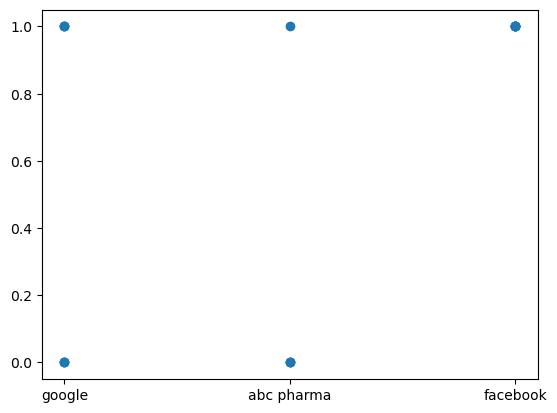

In [108]:
plt.scatter(df['company'],df['salary_more_then_100k'])